In [1]:
#impoer the liberies
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from bdshare import get_basic_hist_data
plt.style .use('fivethirtyeight')
import pandas_datareader.data as reader
import datetime as dt
from prophet import Prophet

In [2]:
start='2020-1-20'
end='2022-10-20'

In [3]:
ticker='Olympic'#'DELTALIFE'#'PUBALIBANK'#
df=get_basic_hist_data(start,end,ticker,index='date')
df=df[~(df.open<=0)]
df['Adjustment']=(df['open']+df['close'])/2
m=pd.to_datetime(df.index)
m
df.set_index(m, inplace=True)
t=df.asfreq('D')
df

,open,high,low,close,volume,Adjustment
date,,,,,,
2020-10-21,182.9,183.4,180.0,181.4,44202,182.15
2020-10-22,181.0,183.0,179.5,181.9,80524,181.45
2020-10-25,178.4,185.0,178.4,180.8,42661,179.60
2020-10-27,179.5,182.0,165.3,172.0,50895,175.75
2020-10-28,180.0,180.0,173.8,177.3,44534,178.65
...,...,...,...,...,...,...
2022-10-16,120.0,121.9,118.0,118.3,152046,119.15
2022-10-17,119.0,120.1,116.0,116.6,188936,117.80
2022-10-18,119.0,127.0,115.5,125.5,306327,122.25


In [4]:
#Calculate RSI
delta=df['Adjustment'].diff(1)
delta=delta.dropna()
up=delta.copy()
down=delta.copy()
up[up<0]=0
down[down>0]=0
time_period=40
AVG_Gain=up.rolling(window=time_period).mean()
AVG_Loss=abs(down.rolling(window=time_period).mean())
RS=AVG_Gain/AVG_Loss
RSI=100.0-(100.0/(1.0+RS))
df['RSI']=RSI
df['pct change']=df['RSI'].pct_change()

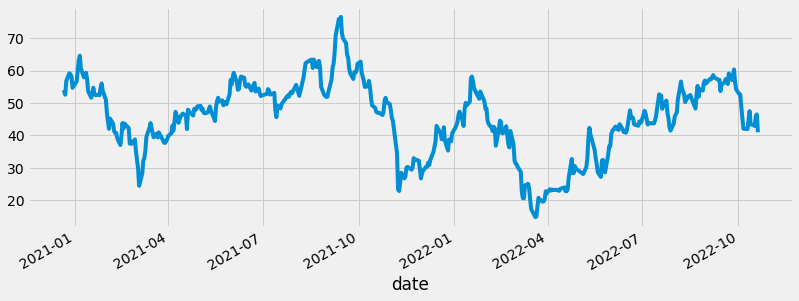

In [5]:
#Plot the RSI
plt.figure(figsize=(12.2,4.5))
RSI.plot()
plt.show()

In [6]:
mean=RSI.mean()
std=RSI.std()
#New_mean=df['RSI'][(df['RSI']<mean)].mean()
#New_std=df['RSI'][(df['RSI']<mean)].std()
upper_bound=mean+std
lower_bound=mean-1.8*std

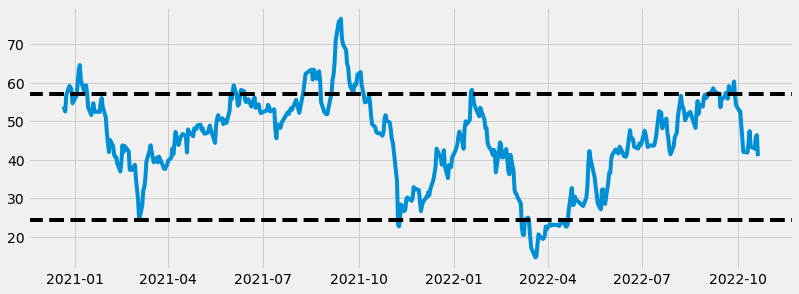

In [7]:
#Plot the RSI
plt.figure(figsize=(12.2,4.5))
plt.plot(np.array(df.index),df['RSI'].values)
plt.axhline(upper_bound, color='k', linestyle='--',label='Buy Pric')
plt.axhline(lower_bound, color='k', linestyle='--',label='Buy Pric')

plt.show()

In [8]:
Sell=df[(df['RSI']<lower_bound)]
Buy=df[(df['RSI']>upper_bound)]
Buy

,open,high,low,close,volume,Adjustment,RSI,pct change
date,,,,,,,,
2020-12-27,193.0,195.0,190.0,191.6,63877,192.30,59.167226,0.041343
2020-12-28,191.2,192.5,187.8,191.3,163878,191.25,58.811749,-0.006008
2020-12-29,192.0,192.5,188.5,191.0,135019,191.50,58.141113,-0.011403
2021-01-04,199.3,201.0,194.0,195.0,94198,197.15,60.138977,0.060471
2021-01-05,195.5,214.5,195.1,205.9,290160,200.70,63.265306,0.051985
...,...,...,...,...,...,...,...,...
2022-09-20,135.0,139.5,134.0,134.8,676705,134.90,57.281106,-0.001382
2022-09-22,135.0,135.0,131.5,131.9,248292,133.45,59.104046,0.058442
2022-09-25,132.0,134.6,127.9,129.0,445068,130.50,57.048250,-0.034783


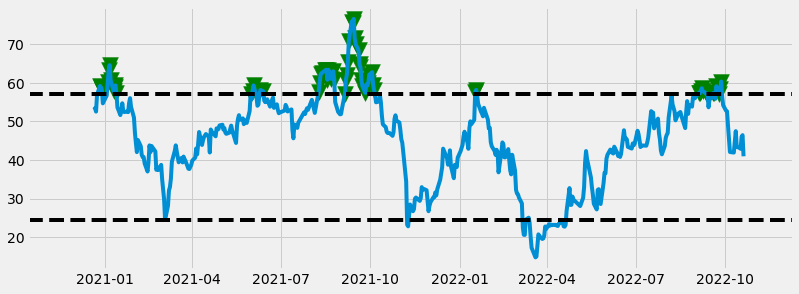

In [9]:
#Plot the RSI
x=start
y=end
plt.figure(figsize=(12.2,4.5))
plt.scatter(np.array(Buy.index),Buy['RSI'].values, color='g', marker='v',s=250)
plt.plot(np.array(df.index),df['RSI'].values)
plt.axhline(upper_bound, color='k', linestyle='--',label='Buy Pric')
plt.axhline(lower_bound, color='k', linestyle='--',label='Buy Pric')
#plt.scatter(np.array(Sell.index),Sell['RSI'].values, color='R', marker='v',s=250)
plt.show()

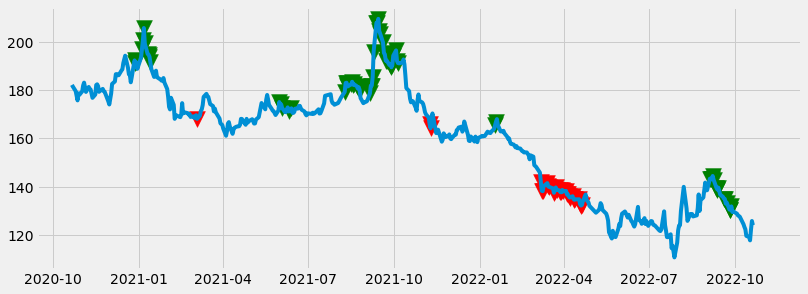

In [10]:
#Plot the RSI
x=start
y=end
plt.figure(figsize=(12.2,4.5))
plt.scatter(np.array(Buy.index),Buy['Adjustment'].values, color='g', marker='v',s=250)
plt.plot(np.array(df.index),df['Adjustment'].values)
plt.scatter(np.array(Sell.index),Sell['Adjustment'].values, color='R', marker='v',s=250)
plt.show()

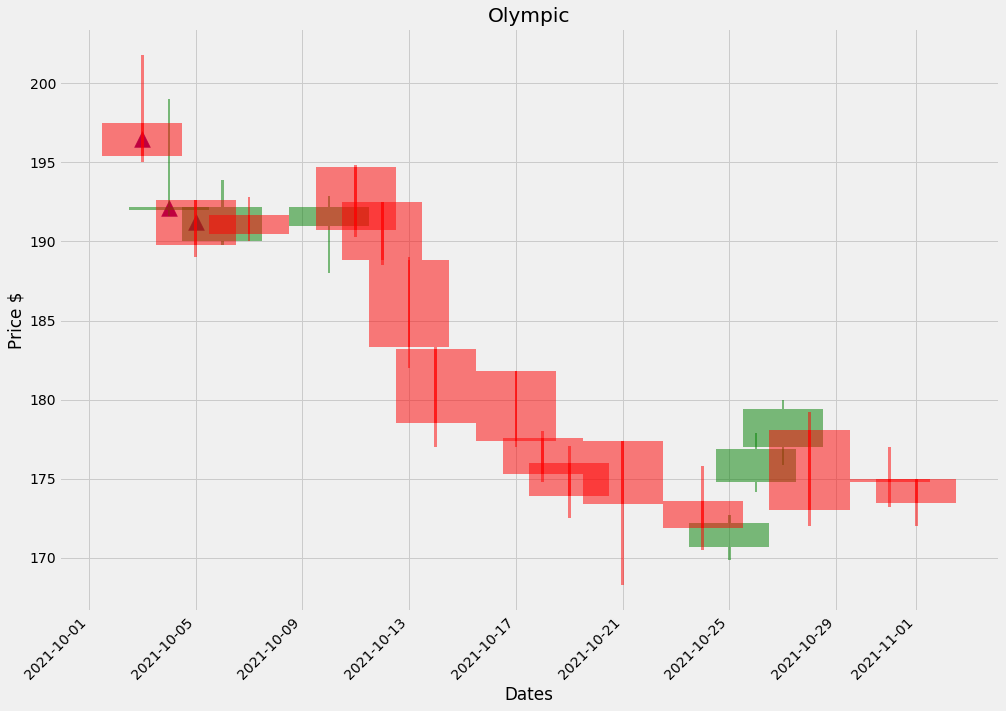

In [11]:
#create figure
x='2021-10-1'
y='2021-11-1'
plt.figure(figsize=(15,10))
df1=df.sort_index().loc[x:y]
Buy1=Buy.sort_index().loc[x:y]
Sell1=Sell.sort_index().loc[x:y]

#define width of candlestick elements
width = 3
width2 = 0.1

#define up and down prices
up = df1[df1.close>=df1.open]
down = df1[df1.close<df1.open]

#define colors to use
col1 = 'green'
col2 = 'red'

#plot up prices
plt.bar(up.index,up.close-up.open,width,bottom=up.open,color=col1,alpha=0.5)
plt.bar(up.index,up.high-up.close,width2,bottom=up.close,color=col1,alpha=0.5)
plt.bar(up.index,up.low-up.open,width2,bottom=up.open,color=col1,alpha=0.5)

#plot down priceo
plt.bar(down.index,down.close-down.open,width,bottom=down.open,color=col2,alpha=0.5)
plt.bar(down.index,down.high-down.close,width2,bottom=down.close,color=col2,alpha=0.5)
plt.bar(down.index,down.low-down.open,width2,bottom=down.open,color=col2,alpha=0.5)

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')
plt.scatter(np.array(Buy1.index),Buy1['Adjustment'].values, color='purple', marker='^',s=250)
#display candlestick chart
plt.title(ticker)
plt.xlabel('Dates')
plt.ylabel('Price $')
#plt.legend(fontsize=16)
plt.show()


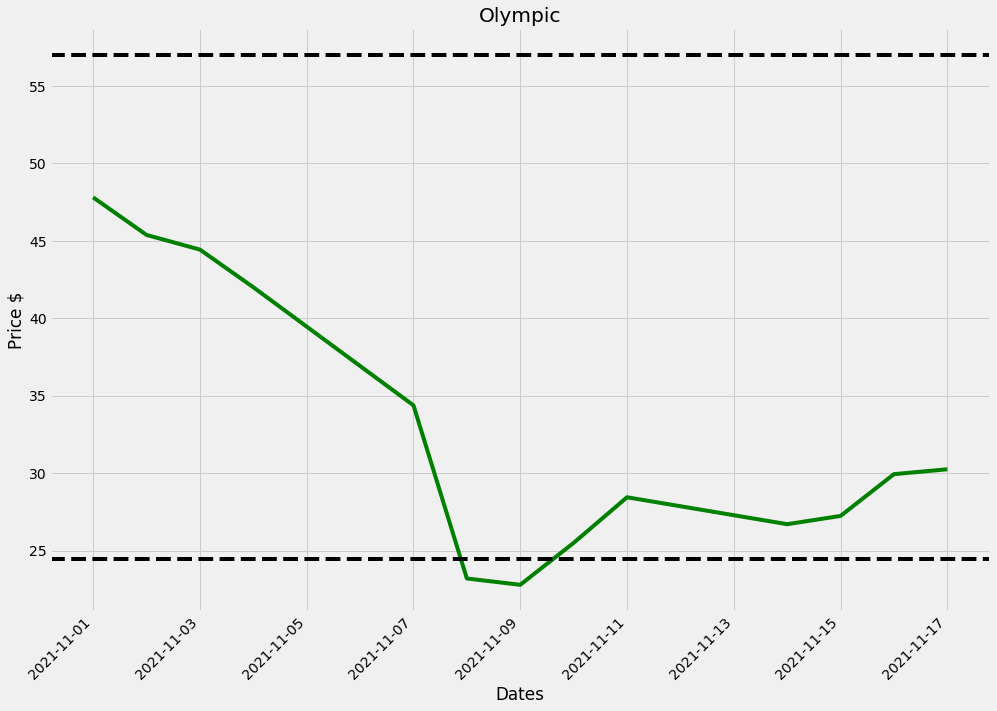

In [12]:
#create figure
x='2021-11-1'
y='2021-11-19'
plt.figure(figsize=(15,10))
df1=df.sort_index().loc[x:y]
Buy1=Buy.sort_index().loc[x:y]
Sell1=Sell.sort_index().loc[x:y]
#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')
plt.plot(np.array(df1.index),df1['RSI'].values, color='g')
plt.axhline(upper_bound, color='k', linestyle='--',label='Buy Pric')
plt.axhline(lower_bound, color='k', linestyle='--',label='Buy Pric')
#display candlestick chart

plt.title(ticker)
plt.xlabel('Dates')
plt.ylabel('Price $')
#plt.legend(fontsize=16)
plt.show()
